In [1]:
import pickle
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import diagnostic_plots

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

with open('first_group_top40.pkl', 'rb') as picklefile:
    df = pickle.load(picklefile)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
float_cols = ['BA', 'OBP', 'SLG', 'OPS', 'dWAR']
integer_cols = ['Year', 'Age', 'Games_Played', 'Plate_Appearances', 'At_Bats',
                'Runs', 'Hits', '2B', '3B', 'HR', 'RBI', 'SB', 'BB', 'SO', 'TB', 'HBP', 'SF']
for i in integer_cols:
    df[i] = df[i].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 33 columns):
Player_Name          1565 non-null object
Year                 1565 non-null int64
Age                  1565 non-null int64
Team                 1565 non-null object
League               1565 non-null object
Games_Played         1565 non-null int64
Plate_Appearances    1565 non-null int64
At_Bats              1565 non-null int64
Runs                 1565 non-null int64
Hits                 1565 non-null int64
2B                   1565 non-null int64
3B                   1565 non-null int64
HR                   1565 non-null int64
RBI                  1565 non-null int64
SB                   1565 non-null int64
CS                   1565 non-null object
BB                   1565 non-null int64
SO                   1565 non-null int64
BA                   1565 non-null object
OBP                  1565 non-null object
SLG                  1565 non-null object
OPS                  1565

In [3]:
df_2018 = df[df['Year'] == 2018]
df_2018_team = df_2018[['Player_Name', 'Team']]
df_2018_pos = df_2018[['Player_Name', 'Pos']]

In [4]:
df_2018_pos

,Player_Name,Pos
1,Scott Alexander,1
11,Rich Hill,1
19,Daniel Hudson,1
28,Kenley Jansen,1
34,Alex Wood,1
45,Clayton Kershaw,1
48,Kenta Maeda,1
51,Ross Stripling,1
53,Pat Venditte,/1
58,Erik Goeddel,1


In [5]:
df_2018_pos['Pos'] = df_2018_pos['Pos'].str.replace('*', '')
df_2018_pos['Pos'] = df_2018_pos['Pos'].str.replace('/', '')
df_2018_pos['Pos'] = df_2018_pos['Pos'].str[0]

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [6]:
df_2018_pos

,Player_Name,Pos
1,Scott Alexander,1
11,Rich Hill,1
19,Daniel Hudson,1
28,Kenley Jansen,1
34,Alex Wood,1
45,Clayton Kershaw,1
48,Kenta Maeda,1
51,Ross Stripling,1
53,Pat Venditte,1
58,Erik Goeddel,1


In [7]:
df_2018_team

,Player_Name,Team
1,Scott Alexander,LAD
11,Rich Hill,LAD
19,Daniel Hudson,LAD
28,Kenley Jansen,LAD
34,Alex Wood,LAD
45,Clayton Kershaw,LAD
48,Kenta Maeda,LAD
51,Ross Stripling,LAD
53,Pat Venditte,LAD
58,Erik Goeddel,TOT


In [8]:
df = df[df['Year'] > 2010]
df = df[df['Year'] < 2018]

In [9]:
df.loc[:, 'BA'] = df.loc[:, 'Hits'] / df.loc[:, 'At_Bats']
df.loc[:, 'OBP'] = (df.loc[:, 'Hits'] + df.loc[:, 'BB'] + df.loc[:, 'HBP']) / \
    (df.loc[:, 'At_Bats'] + df.loc[:, 'BB'] + df.loc[:, 'HBP'] + df.loc[:, 'SF'])
df.loc[:, 'SLG'] = df.loc[:, 'TB'] / df.loc[:, 'At_Bats']
df.loc[:, 'OPS'] = df.loc[:, 'OBP'] + df.loc[:, 'SLG']

In [10]:
df['BA']
df['OBP']
df['SLG']
df['OPS']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073 entries, 0 to 1563
Data columns (total 33 columns):
Player_Name          1073 non-null object
Year                 1073 non-null int64
Age                  1073 non-null int64
Team                 1073 non-null object
League               1073 non-null object
Games_Played         1073 non-null int64
Plate_Appearances    1073 non-null int64
At_Bats              1073 non-null int64
Runs                 1073 non-null int64
Hits                 1073 non-null int64
2B                   1073 non-null int64
3B                   1073 non-null int64
HR                   1073 non-null int64
RBI                  1073 non-null int64
SB                   1073 non-null int64
CS                   1073 non-null object
BB                   1073 non-null int64
SO                   1073 non-null int64
BA                   853 non-null float64
OBP                  856 non-null float64
SLG                  853 non-null float64
OPS                  853 

In [11]:
def make_float(x):
    try:
        return float(x)
    except:
        return None

In [12]:
df['Salary'] = df['Salary'].str.replace(',', '')
df['Salary'] = df['Salary'].str.replace('$', '')
df['Salary'] = df['Salary'].apply(make_float)

In [13]:
df['Pos'] = df['Pos'].str.replace('*', '')
df['Pos'] = df['Pos'].str.replace('/', '')
df['Pos'] = df['Pos'].str[0]

In [14]:
df['All_Star'] = df['Awards'].str.replace('AS', '1')
df['All_Star'] = df['All_Star'].str[0]
df['All_Star'] = df['All_Star'].apply(make_float)

In [15]:
mean_salary = df['Salary'].mean()
df['Adj_Salary'] = df['Salary'] / mean_salary

In [16]:
df2 = df.groupby(["Player_Name"])[['Games_Played', 'Plate_Appearances', 'At_Bats', 'Runs', 'Hits', '2B', '3B',
                                   'HR', 'RBI', 'BA', 'OBP', 'SLG', 'OPS', 'SB', 'BB', 'SO', 'TB', 'HBP', 'SF',
                                   'dWAR','Salary','Adj_Salary']].mean()

In [17]:
df2['Age'] = df.groupby(['Player_Name'])['Age'].max()

In [18]:
df2['All_star_count'] = df.groupby(['Player_Name'])['All_Star'].sum()

In [19]:
df2['Total_games_played'] = df.groupby(['Player_Name'])['Games_Played'].sum()

In [20]:
df2

,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,BA,...,SO,TB,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played
Player_Name,,,,,,,,,,,,,,,,,,,,,
Aaron Loup,3.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1812500.0,0.230546,29,0.0,16
Aaron Sanchez,2.000000,3.333333,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.666667,0.000000,0.000000,0.000000,0.000000,2700000.0,0.343433,23,1.0,6
Adam Eaton,90.666667,403.333333,356.833333,58.000000,101.500000,17.166667,5.833333,6.000000,31.666667,0.279859,...,67.666667,148.333333,7.166667,1.500000,0.283333,6000000.0,0.763185,28,0.0,544
Adam Frazier,93.500000,307.000000,276.000000,38.000000,78.000000,14.000000,3.500000,4.000000,32.000000,0.288616,...,41.500000,111.000000,4.500000,2.000000,0.000000,571000.0,0.072630,25,0.0,187
Adam Kolarek,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,28,0.0,2
Adam Liberatore,32.333333,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.666667,0.000000,0.000000,0.000000,0.000000,NaN,NaN,30,0.0,97
Adam Ottavino,44.666667,3.500000,3.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.111111,...,2.000000,0.333333,0.000000,0.000000,-0.016667,7000000.0,0.890383,31,0.0,268
Adeiny Hechavarria,119.500000,447.166667,418.833333,39.333333,106.833333,15.000000,5.833333,3.666667,34.500000,0.255714,...,72.000000,144.500000,1.000000,2.833333,0.683333,5900000.0,0.750466,28,0.0,717
Adrian Sanchez,34.000000,75.000000,71.000000,6.000000,19.000000,7.000000,0.000000,0.000000,11.000000,0.267606,...,25.000000,26.000000,1.000000,0.000000,0.300000,NaN,NaN,26,0.0,34


In [21]:
df2.reset_index(inplace=True)

df2 = pd.merge(df2, df_2018_team)

df2.set_index('Player_Name')

,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,BA,...,TB,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Team
Player_Name,,,,,,,,,,,,,,,,,,,,,
Aaron Loup,3.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1812500.0,0.230546,29,0.0,16,TOR
Adam Eaton,90.666667,403.333333,356.833333,58.000000,101.500000,17.166667,5.833333,6.000000,31.666667,0.279859,...,148.333333,7.166667,1.500000,0.283333,6000000.0,0.763185,28,0.0,544,WSN
Adam Frazier,93.500000,307.000000,276.000000,38.000000,78.000000,14.000000,3.500000,4.000000,32.000000,0.288616,...,111.000000,4.500000,2.000000,0.000000,571000.0,0.072630,25,0.0,187,PIT
Adam Kolarek,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,28,0.0,2,TBR
Adam Liberatore,32.333333,0.666667,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,30,0.0,97,LAD
Adam Ottavino,44.666667,3.500000,3.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,0.111111,...,0.333333,0.000000,0.000000,-0.016667,7000000.0,0.890383,31,0.0,268,COL
Adeiny Hechavarria,119.500000,447.166667,418.833333,39.333333,106.833333,15.000000,5.833333,3.666667,34.500000,0.255714,...,144.500000,1.000000,2.833333,0.683333,5900000.0,0.750466,28,0.0,717,TBR
Adrian Sanchez,34.000000,75.000000,71.000000,6.000000,19.000000,7.000000,0.000000,0.000000,11.000000,0.267606,...,26.000000,1.000000,0.000000,0.300000,NaN,NaN,26,0.0,34,WSN
Akeel Morris,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,24,0.0,8,LAA


In [22]:
df2.reset_index(inplace=True)

df2 = pd.merge(df2, df_2018_pos)

df2 = df2.set_index('Player_Name')

In [23]:
# DF3 AND DF4 ARE JUST USED TO CREATE POSITION COLUMN

In [24]:
df2 = df2.dropna()

In [25]:
df2

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos
Player_Name,,,,,,,,,,,,,,,,,,,,,
Aaron Loup,0,3.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1812500.0,0.230546,29,0.0,16,TOR,1
Adam Eaton,1,90.666667,403.333333,356.833333,58.000000,101.500000,17.166667,5.833333,6.000000,31.666667,...,7.166667,1.500000,0.283333,6000000.0,0.763185,28,0.0,544,WSN,9
Adam Frazier,2,93.500000,307.000000,276.000000,38.000000,78.000000,14.000000,3.500000,4.000000,32.000000,...,4.500000,2.000000,0.000000,571000.0,0.072630,25,0.0,187,PIT,4
Adam Ottavino,5,44.666667,3.500000,3.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.016667,7000000.0,0.890383,31,0.0,268,COL,1
Adeiny Hechavarria,6,119.500000,447.166667,418.833333,39.333333,106.833333,15.000000,5.833333,3.666667,34.500000,...,1.000000,2.833333,0.683333,5900000.0,0.750466,28,0.0,717,TBR,6
Albert Pujols,9,145.285714,629.428571,571.142857,76.714286,152.571429,27.571429,0.142857,29.428571,98.285714,...,4.142857,6.000000,-0.671429,27000000.0,3.434334,37,1.0,1017,LAA,3
Aledmys Díaz,10,95.000000,380.500000,345.000000,51.000000,97.500000,22.500000,1.500000,12.000000,42.500000,...,3.500000,3.500000,-0.250000,2000000.0,0.254395,26,1.0,190,TOR,6
Alex Wood,13,26.200000,42.800000,37.000000,1.400000,3.800000,0.400000,0.000000,0.000000,2.400000,...,0.000000,0.000000,0.000000,6000000.0,0.763185,26,1.0,131,LAD,1
Andrelton Simmons,14,130.166667,521.500000,480.666667,53.666667,127.000000,22.666667,3.000000,8.166667,46.833333,...,2.500000,3.833333,3.683333,11000000.0,1.399173,27,0.0,781,LAA,6


In [26]:
df2.corr()

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,SO,TB,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played
index,1.000000,-0.162762,-0.200811,-0.197861,-0.199244,-0.196532,-0.198919,-0.213594,-0.125866,-0.167705,...,-0.149718,-0.184161,-0.142810,-0.207530,0.053616,-0.111608,-0.111608,-0.041203,-0.050525,-0.185128
Games_Played,-0.162762,1.000000,0.959746,0.959372,0.936350,0.952346,0.942983,0.715317,0.858508,0.929368,...,0.897234,0.948143,0.735527,0.873980,0.244560,0.409014,0.409014,0.243693,0.356943,0.909693
Plate_Appearances,-0.200811,0.959746,1.000000,0.999155,0.981750,0.993472,0.980570,0.752167,0.899045,0.970280,...,0.932591,0.989895,0.759162,0.913278,0.253551,0.457922,0.457922,0.195792,0.394479,0.887766
At_Bats,-0.197861,0.959372,0.999155,1.000000,0.977635,0.994807,0.981338,0.750803,0.894129,0.968992,...,0.928702,0.989349,0.751863,0.910378,0.261194,0.449460,0.449460,0.193339,0.383928,0.884514
Runs,-0.199244,0.936350,0.981750,0.977635,1.000000,0.980480,0.971727,0.786737,0.920473,0.965492,...,0.928229,0.988391,0.759507,0.891366,0.213640,0.462091,0.462091,0.165190,0.424221,0.857587
Hits,-0.196532,0.952346,0.993472,0.994807,0.980480,1.000000,0.984726,0.763360,0.886955,0.967985,...,0.908714,0.991283,0.749123,0.915194,0.255739,0.463074,0.463074,0.184334,0.410584,0.878618
2B,-0.198919,0.942983,0.980570,0.981338,0.971727,0.984726,1.000000,0.729966,0.891817,0.964416,...,0.906278,0.984241,0.735287,0.909638,0.242519,0.443215,0.443215,0.182273,0.399387,0.863634
3B,-0.213594,0.715317,0.752167,0.750803,0.786737,0.763360,0.729966,1.000000,0.598457,0.668391,...,0.708826,0.747118,0.629635,0.619658,0.256799,0.289914,0.289914,0.021427,0.257924,0.635895
HR,-0.125866,0.858508,0.899045,0.894129,0.920473,0.886955,0.891817,0.598457,1.000000,0.961665,...,0.917297,0.938632,0.627599,0.823585,0.114436,0.431235,0.431235,0.130086,0.403006,0.752207
RBI,-0.167705,0.929368,0.970280,0.968992,0.965492,0.967985,0.964416,0.668391,0.961665,1.000000,...,0.925025,0.987363,0.690376,0.912813,0.190110,0.472755,0.472755,0.180572,0.424943,0.841821


In [27]:
df2

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos
Player_Name,,,,,,,,,,,,,,,,,,,,,
Aaron Loup,0,3.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1812500.0,0.230546,29,0.0,16,TOR,1
Adam Eaton,1,90.666667,403.333333,356.833333,58.000000,101.500000,17.166667,5.833333,6.000000,31.666667,...,7.166667,1.500000,0.283333,6000000.0,0.763185,28,0.0,544,WSN,9
Adam Frazier,2,93.500000,307.000000,276.000000,38.000000,78.000000,14.000000,3.500000,4.000000,32.000000,...,4.500000,2.000000,0.000000,571000.0,0.072630,25,0.0,187,PIT,4
Adam Ottavino,5,44.666667,3.500000,3.000000,0.166667,0.333333,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.016667,7000000.0,0.890383,31,0.0,268,COL,1
Adeiny Hechavarria,6,119.500000,447.166667,418.833333,39.333333,106.833333,15.000000,5.833333,3.666667,34.500000,...,1.000000,2.833333,0.683333,5900000.0,0.750466,28,0.0,717,TBR,6
Albert Pujols,9,145.285714,629.428571,571.142857,76.714286,152.571429,27.571429,0.142857,29.428571,98.285714,...,4.142857,6.000000,-0.671429,27000000.0,3.434334,37,1.0,1017,LAA,3
Aledmys Díaz,10,95.000000,380.500000,345.000000,51.000000,97.500000,22.500000,1.500000,12.000000,42.500000,...,3.500000,3.500000,-0.250000,2000000.0,0.254395,26,1.0,190,TOR,6
Alex Wood,13,26.200000,42.800000,37.000000,1.400000,3.800000,0.400000,0.000000,0.000000,2.400000,...,0.000000,0.000000,0.000000,6000000.0,0.763185,26,1.0,131,LAD,1
Andrelton Simmons,14,130.166667,521.500000,480.666667,53.666667,127.000000,22.666667,3.000000,8.166667,46.833333,...,2.500000,3.833333,3.683333,11000000.0,1.399173,27,0.0,781,LAA,6


In [28]:
batters_only = df2[df2['Pos'] != '1']

batters_only['Doubles'] = batters_only['2B']

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
batters_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, Adam Eaton to Yasmani Grandal
Data columns (total 29 columns):
index                 96 non-null int64
Games_Played          96 non-null float64
Plate_Appearances     96 non-null float64
At_Bats               96 non-null float64
Runs                  96 non-null float64
Hits                  96 non-null float64
2B                    96 non-null float64
3B                    96 non-null float64
HR                    96 non-null float64
RBI                   96 non-null float64
BA                    96 non-null float64
OBP                   96 non-null float64
SLG                   96 non-null float64
OPS                   96 non-null float64
SB                    96 non-null float64
BB                    96 non-null float64
SO                    96 non-null float64
TB                    96 non-null float64
HBP                   96 non-null float64
SF                    96 non-null float64
dWAR                  96 non-null float64


In [30]:
batters_only.corr()

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,TB,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Doubles
index,1.000000,-0.116663,-0.151162,-0.144457,-0.159743,-0.150332,-0.156477,-0.193111,-0.027330,-0.086659,...,-0.124290,-0.067257,-0.179249,0.128561,-0.087595,-0.087595,-0.163445,-0.032867,-0.162565,-0.156477
Games_Played,-0.116663,1.000000,0.974145,0.972375,0.902377,0.945180,0.916326,0.484950,0.754102,0.892030,...,0.933945,0.525308,0.792805,0.107139,0.640583,0.640583,0.454033,0.516300,0.852233,0.916326
Plate_Appearances,-0.151162,0.974145,1.000000,0.997361,0.952686,0.982228,0.946054,0.521744,0.793894,0.928835,...,0.974066,0.528562,0.826877,0.108175,0.688615,0.688615,0.438585,0.567368,0.839447,0.946054
At_Bats,-0.144457,0.972375,0.997361,1.000000,0.940566,0.986203,0.948146,0.518250,0.781663,0.925353,...,0.972358,0.511285,0.819837,0.121935,0.672885,0.672885,0.433905,0.546842,0.831731,0.948146
Runs,-0.159743,0.902377,0.952686,0.940566,1.000000,0.946193,0.922015,0.598990,0.836529,0.911912,...,0.968210,0.533585,0.767264,0.044524,0.682683,0.682683,0.334074,0.618150,0.754509,0.922015
Hits,-0.150332,0.945180,0.982228,0.986203,0.946193,1.000000,0.956174,0.546254,0.759757,0.919141,...,0.975300,0.506032,0.826754,0.113221,0.702396,0.702396,0.392607,0.604300,0.808023,0.956174
2B,-0.156477,0.916326,0.946054,0.948146,0.922015,0.956174,1.000000,0.473951,0.770474,0.909042,...,0.955454,0.477488,0.811301,0.091368,0.656719,0.656719,0.380130,0.580631,0.769247,1.000000
3B,-0.193111,0.484950,0.521744,0.518250,0.598990,0.546254,0.473951,1.000000,0.271921,0.358691,...,0.511998,0.371491,0.309040,0.142236,0.303435,0.303435,0.008086,0.263315,0.380679,0.473951
HR,-0.027330,0.754102,0.793894,0.781663,0.836529,0.759757,0.770474,0.271921,1.000000,0.926587,...,0.881233,0.319571,0.647879,-0.075480,0.564265,0.564265,0.218855,0.522333,0.554585,0.770474
RBI,-0.086659,0.892030,0.928835,0.925353,0.911912,0.919141,0.909042,0.358691,0.926587,1.000000,...,0.969824,0.396229,0.816350,0.012553,0.682722,0.682722,0.355190,0.599203,0.718980,0.909042


In [31]:
batters_only_df = batters_only[['Runs', 'Hits', 'Doubles', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
                                'OPS', 'SB', 'TB', 'SF', 'Adj_Salary', 'Age', 'Total_games_played',
                                'dWAR','All_star_count']]

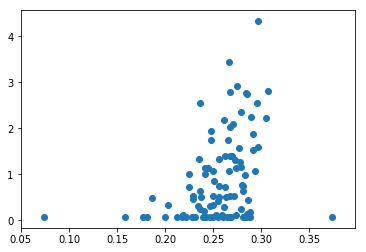

In [32]:
plt.scatter(batters_only_df['BA'], batters_only_df['Adj_Salary'])

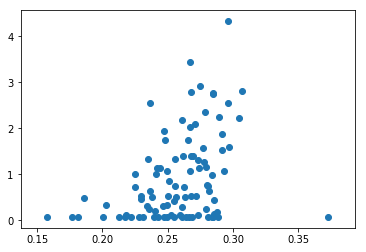

In [33]:
batters_only_df = batters_only_df[batters_only_df['BA'] > 0.15]

plt.scatter(batters_only_df['BA'], batters_only_df['Adj_Salary'])

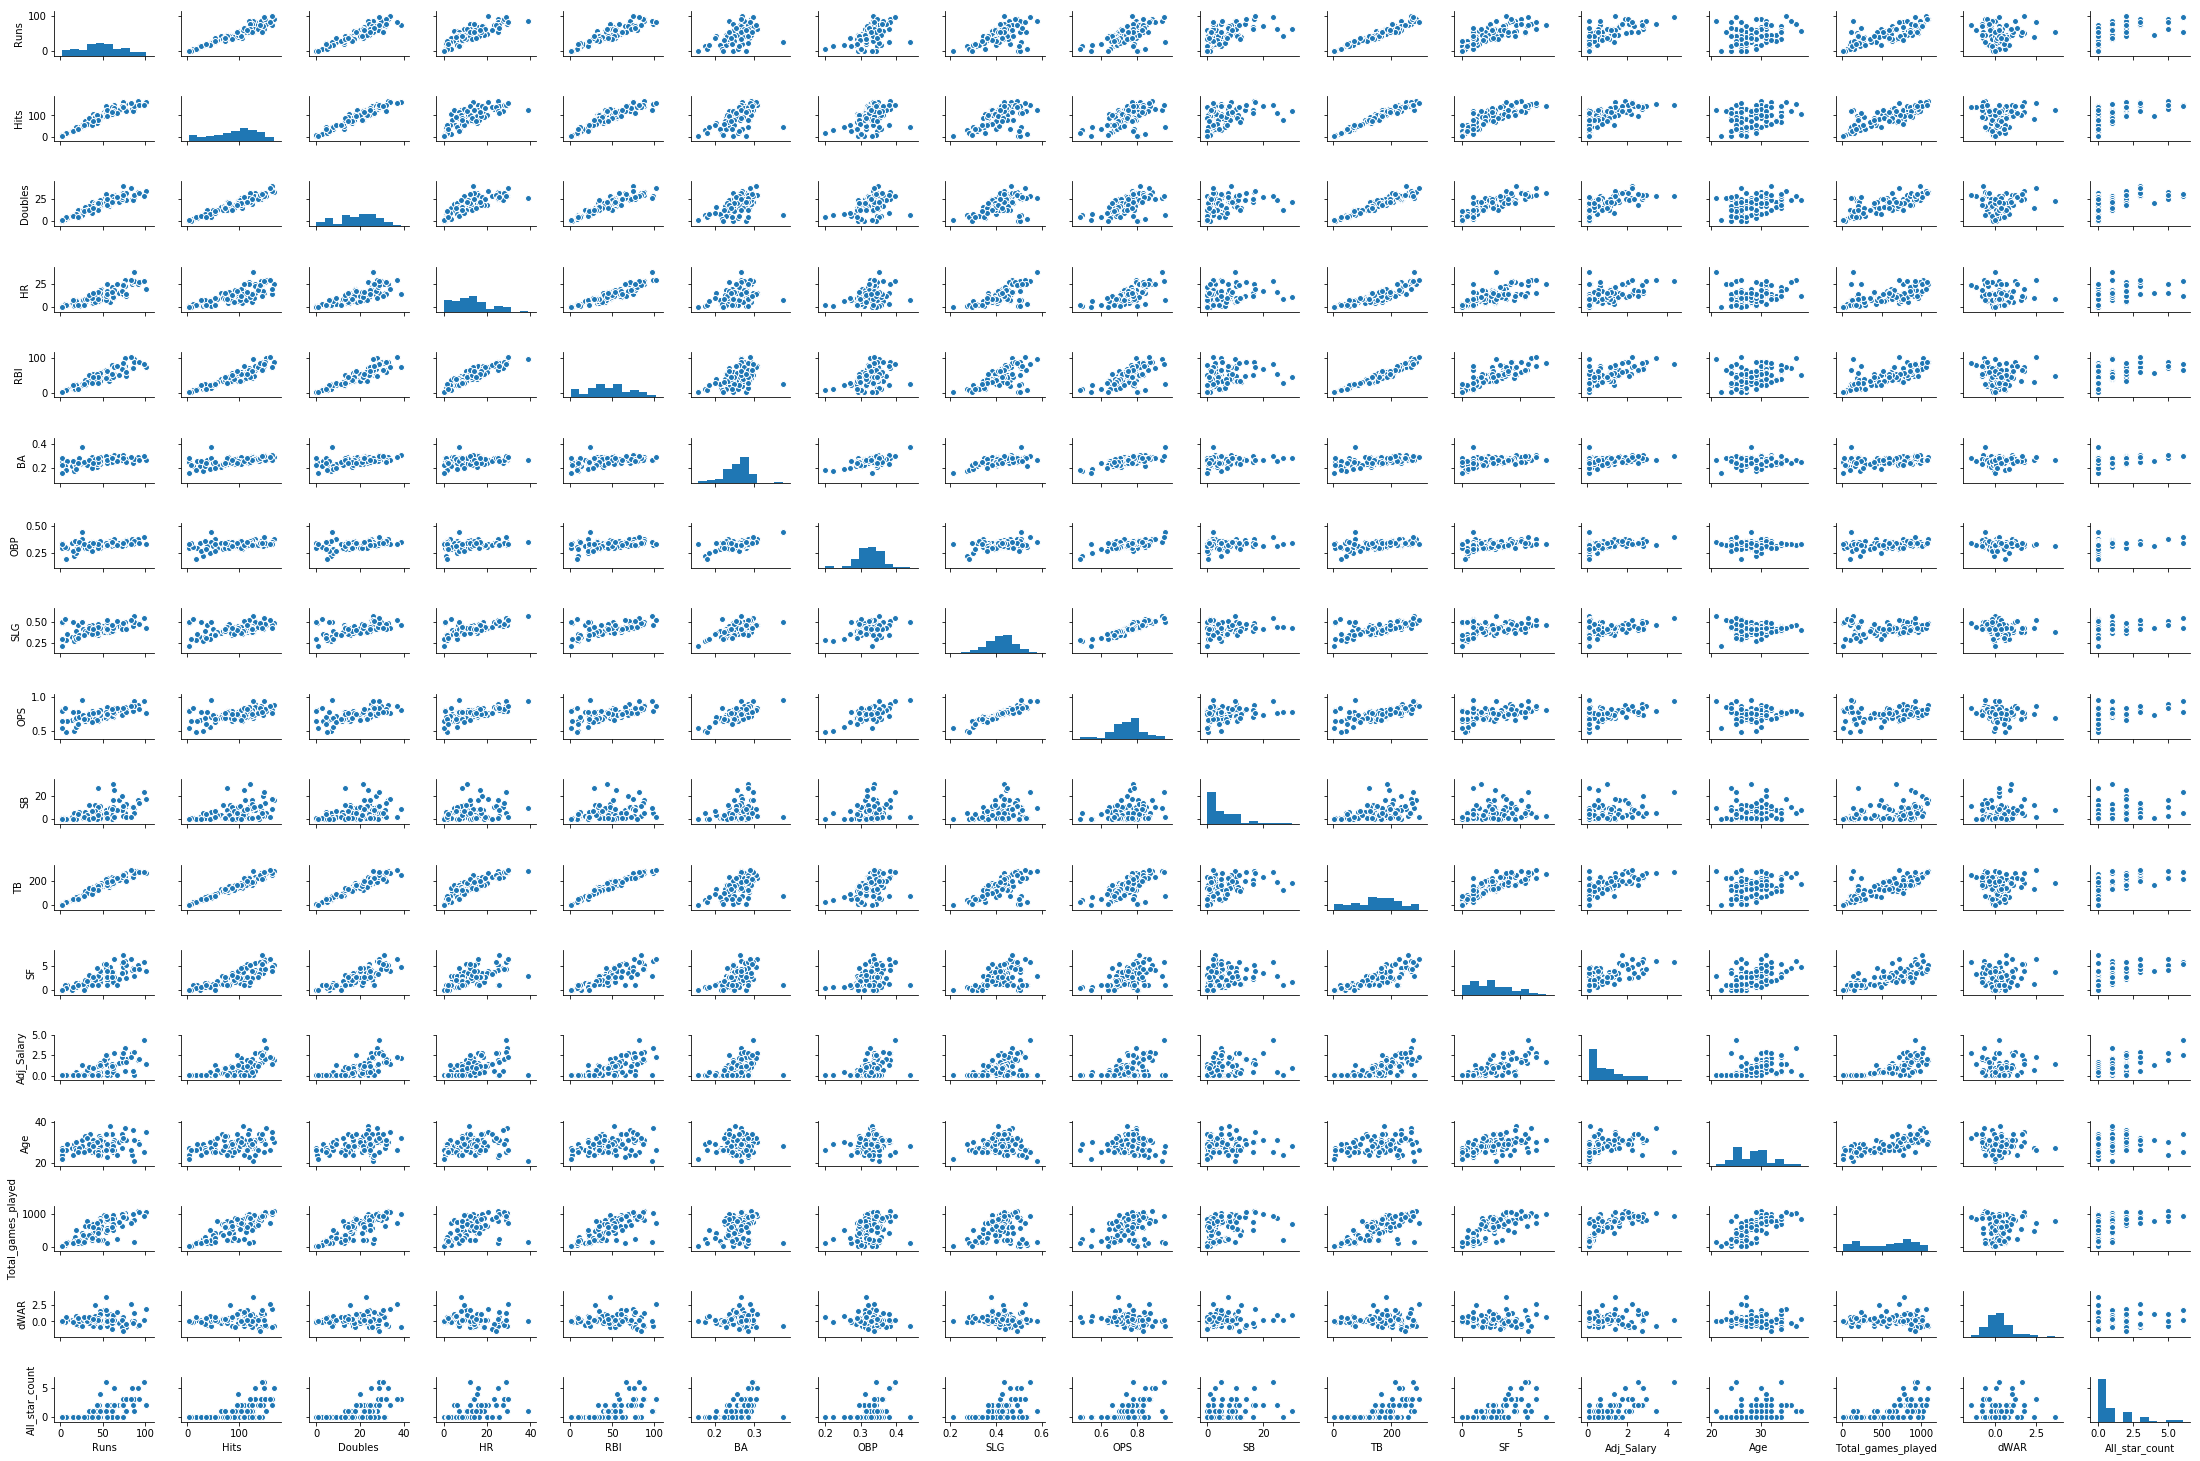

In [34]:
sns.pairplot(batters_only_df, size=1.2, aspect=1.5)

In [35]:
y, X = patsy.dmatrices('Adj_Salary ~ Runs + Hits + Doubles + HR + RBI + BA + OBP + SLG + OPS + SB + TB + SF + Age + Total_games_played + All_star_count + dWAR',
                       data=batters_only_df, return_type="dataframe")

model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Adj_Salary   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     13.01
Date:                Sat, 14 Jul 2018   Prob (F-statistic):           1.21e-15
Time:                        13:57:59   Log-Likelihood:                -69.222
No. Observations:                  95   AIC:                             170.4
Df Residuals:                      79   BIC:                             211.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3993      1.047     -0.381      0.704      -2.483       1.685
Runs                   0.0035      0.014      0.253      0.801      -0.024       0.031
Hits                   0.0170      0.031      0.541      0.590      -0.045       0.079
Doubles               -0.0133      0.033     -0.402      0.689      -0.079       0.053
HR                     0.0255      0.084      0.305      0.761      -0.141       0.192
RBI                    0.0205      0.017      1.177      0.243      -0.014       0.055
BA                    -1.0717      4.664     -0.230      0.819     -10.354       8.211
OBP                    1.7250      1.751      0.985      0.328      -1.761       5.211
SLG                   -0.1878      1.460     -0.129      0.898      -3.094       2.718
OPS                    1.5372      1.263      1.217      0.227      -0.977       4.051
SB                     0.0067      0.014      0.473      0.638      -0.022       0.035
TB                    -0.0193      0.028     -0.682      0.497      -0.076       0.037
SF                     0.0699      0.072      0.965      0.337      -0.074       0.214
Age                   -0.0434      0.031     -1.403      0.165      -0.105       0.018
Total_games_played     0.0018      0.001      3.286      0.002       0.001       0.003
All_star_count         0.1709      0.058      2.964      0.004       0.056       0.286
dWAR                   0.0416      0.079      0.525      0.601      -0.116       0.199
==============================================================================
Omnibus:                        3.753   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                4.318
Skew:                           0.039   Prob(JB):                        0.115
Kurtosis:                       4.042   Cond. No.                     4.27e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

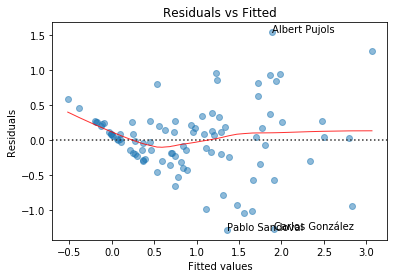

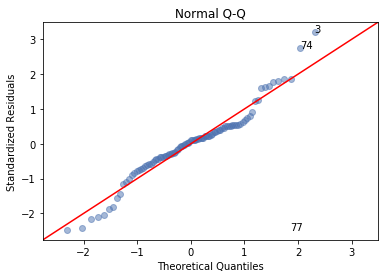

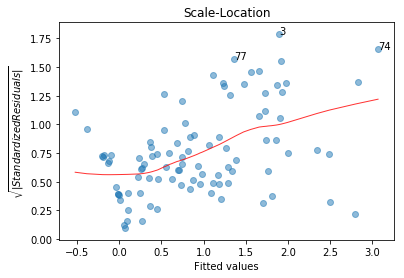

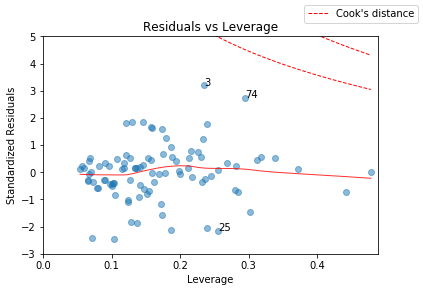

In [36]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'Adj_Salary', axis=1), batters_only_df['Adj_Salary'], fit)

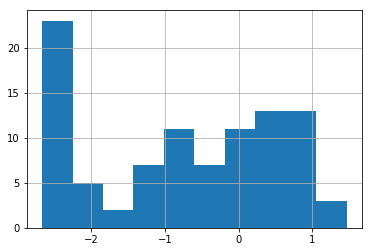

In [37]:
batters_only_df['log_salary'] = np.log(batters_only_df.Adj_Salary)

batters_only_df.log_salary.hist()

In [38]:
y, X = patsy.dmatrices('log_salary ~ Runs + Hits + Doubles + HR + RBI + BA + OBP + SLG + OPS + SB + TB + SF + Age + Total_games_played + All_star_count + dWAR',
                       data=batters_only_df, return_type="dataframe")

model2 = sm.OLS(y, X)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     22.46
Date:                Sat, 14 Jul 2018   Prob (F-statistic):           1.93e-22
Time:                        13:58:00   Log-Likelihood:                -82.527
No. Observations:                  95   AIC:                             197.1
Df Residuals:                      79   BIC:                             237.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.6800      1.204     -2.225      0.029      -5.077      -0.283
Runs                  -0.0086      0.016     -0.537      0.593      -0.041       0.023
Hits                   0.0573      0.036      1.588      0.116      -0.015       0.129
Doubles                0.0069      0.038      0.182      0.856      -0.069       0.083
HR                     0.1230      0.096      1.279      0.205      -0.068       0.314
RBI                   -0.0249      0.020     -1.244      0.217      -0.065       0.015
BA                    -4.6976      5.365     -0.876      0.384     -15.376       5.981
OBP                    2.2270      2.014      1.105      0.272      -1.783       6.237
SLG                    0.6026      1.679      0.359      0.721      -2.740       3.945
OPS                    2.8296      1.453      1.948      0.055      -0.062       5.721
SB                    -0.0186      0.016     -1.135      0.260      -0.051       0.014
TB                    -0.0345      0.033     -1.058      0.293      -0.099       0.030
SF                     0.0056      0.083      0.067      0.947      -0.160       0.171
Age                   -0.0807      0.036     -2.267      0.026      -0.151      -0.010
Total_games_played     0.0040      0.001      6.342      0.000       0.003       0.005
All_star_count         0.0131      0.066      0.198      0.843      -0.119       0.145
dWAR                   0.1163      0.091      1.277      0.205      -0.065       0.297
==============================================================================
Omnibus:                       21.800   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.778
Skew:                          -0.907   Prob(JB):                     2.30e-09
Kurtosis:                       5.599   Cond. No.                     4.27e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

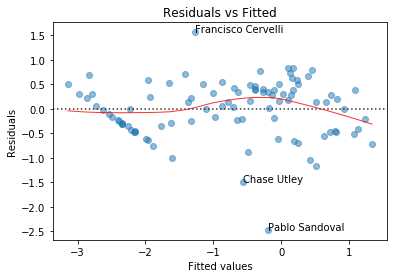

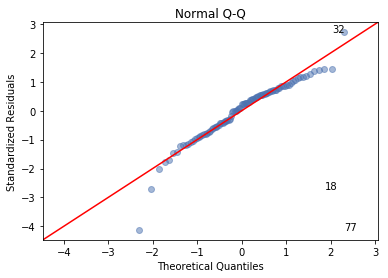

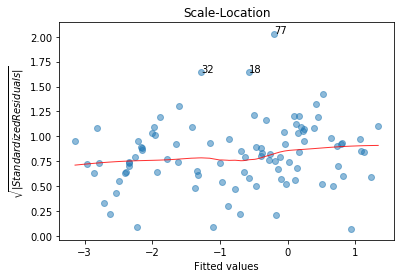

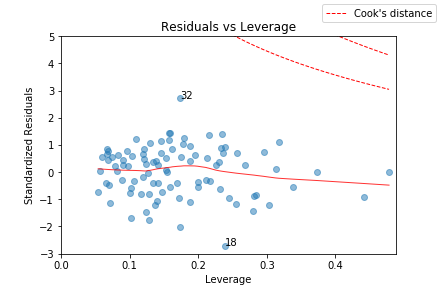

In [39]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit2)

In [40]:
y, X = patsy.dmatrices('log_salary ~ Runs + Hits + HR + RBI + BA + OBP + OPS + SB + TB + Age + Total_games_played + All_star_count + dWAR',
                       data=batters_only_df, return_type="dataframe")

model3 = sm.OLS(y, X)

fit3 = model3.fit()

fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     26.56
Date:                Sat, 14 Jul 2018   Prob (F-statistic):           7.34e-24
Time:                        13:58:01   Log-Likelihood:                -82.551
No. Observations:                  95   AIC:                             193.1
Df Residuals:                      81   BIC:                             228.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.6999      1.185     -2.278      0.025      -5.058      -0.342
Runs                  -0.0089      0.016     -0.573      0.569      -0.040       0.022
Hits                   0.0537      0.030      1.805      0.075      -0.005       0.113
HR                     0.1104      0.070      1.585      0.117      -0.028       0.249
RBI                   -0.0240      0.018     -1.297      0.198      -0.061       0.013
BA                    -4.7761      5.279     -0.905      0.368     -15.279       5.727
OBP                    1.5747      3.362      0.468      0.641      -5.114       8.264
OPS                    3.4697      2.373      1.462      0.147      -1.251       8.190
SB                    -0.0195      0.015     -1.264      0.210      -0.050       0.011
TB                    -0.0306      0.024     -1.294      0.199      -0.078       0.016
Age                   -0.0796      0.035     -2.305      0.024      -0.148      -0.011
Total_games_played     0.0040      0.001      6.576      0.000       0.003       0.005
All_star_count         0.0153      0.064      0.239      0.812      -0.112       0.143
dWAR                   0.1165      0.090      1.298      0.198      -0.062       0.295
==============================================================================
Omnibus:                       21.977   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.070
Skew:                          -0.915   Prob(JB):                     1.99e-09
Kurtosis:                       5.602   Cond. No.                     5.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

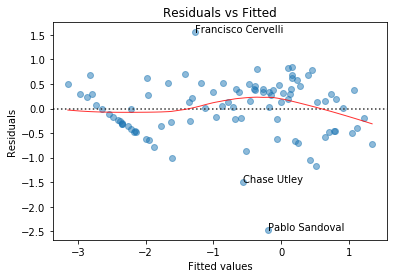

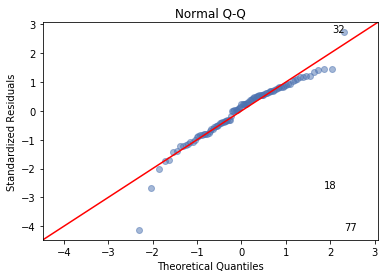

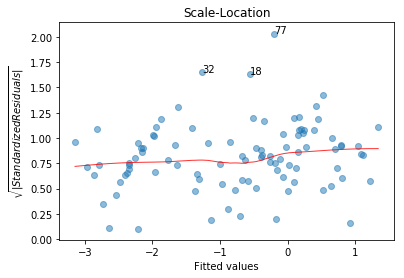

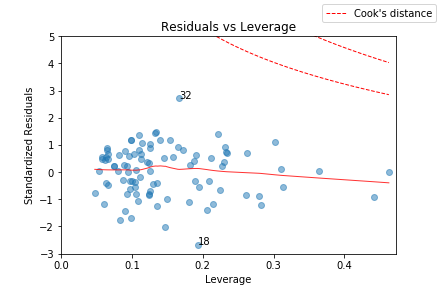

In [41]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit3)

In [42]:
y, X = patsy.dmatrices('log_salary ~ Runs + Hits + HR + RBI + BA + OPS + SB + TB + Age + Total_games_played + dWAR',
                       data=batters_only_df, return_type="dataframe")

model4 = sm.OLS(y, X)

fit4 = model4.fit()

fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     32.02
Date:                Sat, 14 Jul 2018   Prob (F-statistic):           2.62e-25
Time:                        13:58:02   Log-Likelihood:                -82.722
No. Observations:                  95   AIC:                             189.4
Df Residuals:                      83   BIC:                             220.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.5555      1.118     -2.286      0.025      -4.779      -0.332
Runs                  -0.0052      0.014     -0.378      0.706      -0.033       0.022
Hits                   0.0572      0.029      1.993      0.050       0.000       0.114
HR                     0.1140      0.069      1.663      0.100      -0.022       0.250
RBI                   -0.0222      0.018     -1.244      0.217      -0.058       0.013
BA                    -4.8113      5.222     -0.921      0.360     -15.198       5.576
OPS                    4.0848      2.038      2.004      0.048       0.031       8.139
SB                    -0.0205      0.015     -1.366      0.175      -0.050       0.009
TB                    -0.0347      0.022     -1.571      0.120      -0.079       0.009
Age                   -0.0829      0.033     -2.498      0.014      -0.149      -0.017
Total_games_played     0.0041      0.001      7.192      0.000       0.003       0.005
dWAR                   0.1155      0.088      1.308      0.195      -0.060       0.291
==============================================================================
Omnibus:                       20.669   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.249
Skew:                          -0.864   Prob(JB):                     8.16e-09
Kurtosis:                       5.535   Cond. No.                     5.90e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

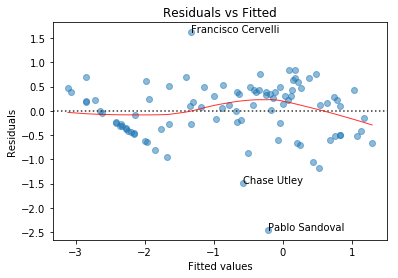

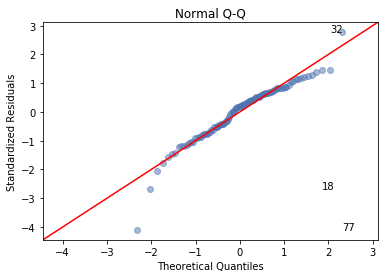

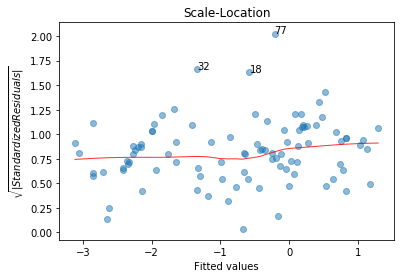

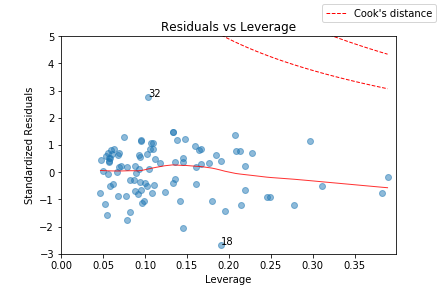

In [43]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit4)

In [44]:
y, X = patsy.dmatrices('log_salary ~ Hits + HR + RBI + BA + OPS + SB + TB + Age + dWAR + Total_games_played + dWAR',
                       data=batters_only_df, return_type="dataframe")

model5 = sm.OLS(y, X)

fit5 = model5.fit()

fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     35.57
Date:                Sat, 14 Jul 2018   Prob (F-statistic):           4.57e-26
Time:                        13:58:03   Log-Likelihood:                -82.804
No. Observations:                  95   AIC:                             187.6
Df Residuals:                      84   BIC:                             215.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.5264      1.110     -2.277      0.025      -4.733      -0.320
Hits                   0.0586      0.028      2.068      0.042       0.002       0.115
HR                     0.1177      0.068      1.742      0.085      -0.017       0.252
RBI                   -0.0210      0.018     -1.201      0.233      -0.056       0.014
BA                    -4.4866      5.125     -0.875      0.384     -14.678       5.704
OPS                    3.9630      2.002      1.979      0.051      -0.019       7.945
SB                    -0.0229      0.013     -1.697      0.093      -0.050       0.004
TB                    -0.0377      0.020     -1.842      0.069      -0.078       0.003
Age                   -0.0836      0.033     -2.538      0.013      -0.149      -0.018
dWAR                   0.1191      0.087      1.363      0.177      -0.055       0.293
Total_games_played     0.0041      0.001      7.223      0.000       0.003       0.005
==============================================================================
Omnibus:                       19.993   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.313
Skew:                          -0.858   Prob(JB):                     3.54e-08
Kurtosis:                       5.392   Cond. No.                     5.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

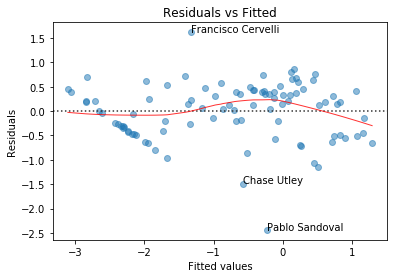

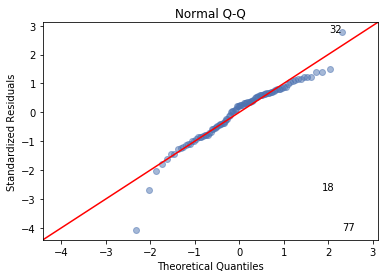

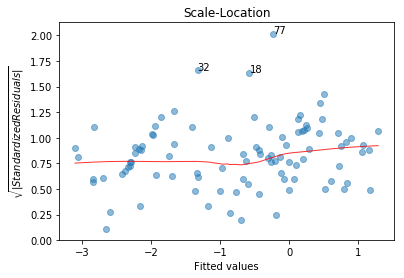

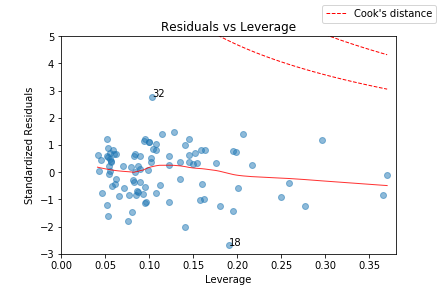

In [45]:
diagnostic_plots.diagnostic_plots(batters_only_df.drop(
    'log_salary', axis=1), batters_only_df['log_salary'], fit5)

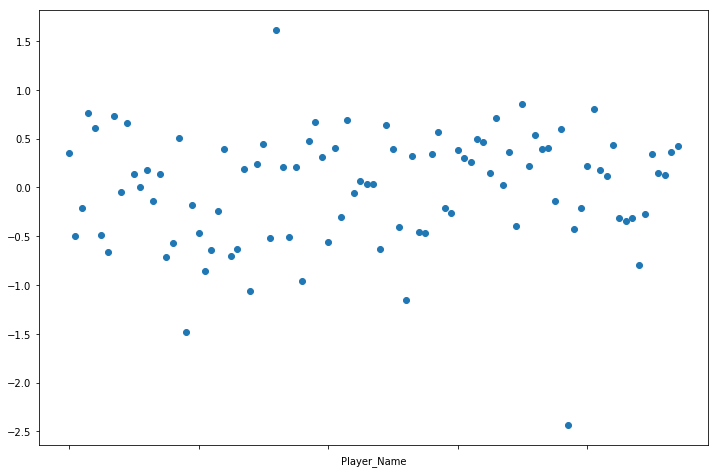

In [46]:
fit5.resid.plot(style='o', figsize=(12, 8))